In [1]:
import pandas as pd
import pathlib as path



import requests
import json
from pprint import pprint

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

# import files

In [2]:
### import and read csv file

path = 'Output/immigrants_by_country_year.csv'
imm_df = pd.read_csv(path)
imm_df = imm_df.rename(columns={'total':'Immigration_flow'})

imm_df.head(5)

,country,year,Immigration_flow
0,Afghanistan,2015,2625.0
1,Afghanistan,2016,2655.0
2,Afghanistan,2017,3460.0
3,Afghanistan,2018,3560.0
4,Afghanistan,2019,3890.0


In [3]:
### import and read csv file

path = 'Output/immigrants_by_country.csv'
imm_cumul_df = pd.read_csv(path)
imm_cumul_df = imm_cumul_df.rename(columns={'total':'Immigration_flow'})

imm_cumul_df.head(5)

,country,Immigration_flow
0,Afghanistan,81305.0
1,Albania,5540.0
2,Algeria,39655.0
3,Andorra,0.0
4,Angola,925.0


In [4]:
### import and read csv file

path = 'Output/countries_list_UN_referential.csv'
countries_df = pd.read_csv(path)


countries_df.head(5)

,Unnamed: 0,iso3Code,iso2Code,country,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.51670
1,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.52280
2,5,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.2420,-8.81155
3,6,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.33170
4,7,AND,AD,Andorra,Europe & Central Asia,Andorra la Vella,1.5218,42.50750


In [5]:
### import and read csv file

path = 'Output/macro_economic_data.csv'
macro_data_df = pd.read_csv(path)

# #drop Nan values
# macro_data_df = macro_data_df['value'].dropna(how="all")

macro_data_df.head(5)

,Unnamed: 0,iso3Code,iso2Code,country,year,indicator,value
0,0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533


# immigration flow per year

In [6]:
immigration_year = imm_df.groupby(['year'])['Immigration_flow'].sum()
immigration_year

year
2015    271155.0
2016    295675.0
2017    285795.0
2018    320300.0
2019    340460.0
2020    183600.0
2021    405185.0
2022    436820.0
2023    471040.0
2024    413910.0
Name: Immigration_flow, dtype: float64

<Axes: title={'center': 'Flow immigration per year'}, xlabel='year', ylabel='Flow immigration'>

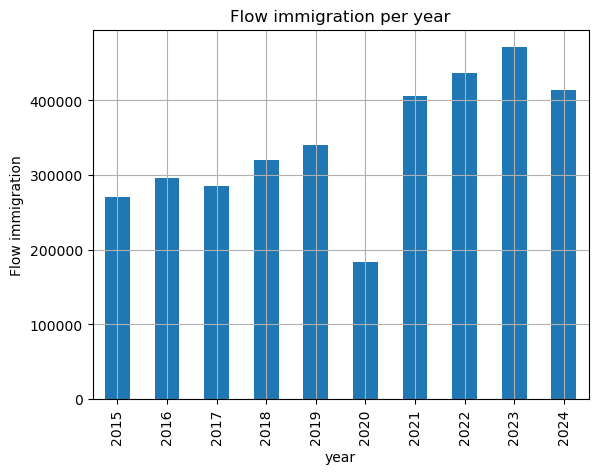

In [7]:
ax = immigration_year.plot(kind='bar')
ax.set_title('Flow immigration per year')
ax.set_ylabel('Flow immigration')
ax.grid()
ax

# macro_data average

In [8]:
print(f'before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'after{macro_data_df_clean.shape}')

before(7515, 7)
after(5095, 7)


In [9]:
macro_data_df_clean

,Unnamed: 0,iso3Code,iso2Code,country,year,indicator,value
0,0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533
...,...,...,...,...,...,...,...
7487,7487,VUT,VU,Vanuatu,2015,"Population, total",266101.000000
7491,7491,VUT,VU,Vanuatu,2020,Unemployment with advanced education (% of tot...,2.113000
7500,7500,VUT,VU,Vanuatu,2020,"Unemployment, total (% of total labor force) (...",4.046000
7501,7501,VUT,VU,Vanuatu,2019,"Unemployment, total (% of total labor force) (...",5.445000


In [10]:
macro_data_avg_df = macro_data_df_clean.groupby(['country', 'indicator'])['value'].mean() 
macro_data_avg_df

country      indicator                                                                            
Afghanistan  GDP per capita (constant 2015 US$)                                                       4.996702e+02
             Population, total                                                                        3.776927e+07
             Unemployment with advanced education (% of total labor force with advanced education)    1.320833e+01
             Unemployment, total (% of total labor force) (national estimate)                         9.524333e+00
Albania      GDP per capita (constant 2015 US$)                                                       4.568487e+03
                                                                                                          ...     
Zimbabwe     GDP per capita (constant 2015 US$)                                                       1.366464e+03
             Population, total                                                                  

In [11]:
macro_data_avg_df= macro_data_avg_df.reset_index()
macro_data_avg_df

,country,indicator,value
0,Afghanistan,GDP per capita (constant 2015 US$),4.996702e+02
1,Afghanistan,"Population, total",3.776927e+07
2,Afghanistan,Unemployment with advanced education (% of tot...,1.320833e+01
3,Afghanistan,"Unemployment, total (% of total labor force) (...",9.524333e+00
4,Albania,GDP per capita (constant 2015 US$),4.568487e+03
...,...,...,...
733,Zimbabwe,GDP per capita (constant 2015 US$),1.366464e+03
734,Zimbabwe,"Population, total",1.531684e+07
735,Zimbabwe,Poverty headcount ratio at $2.15 a day (2017 P...,3.700000e+01
736,Zimbabwe,Unemployment with advanced education (% of tot...,6.156250e+00


In [12]:
macro_data_avg_df = macro_data_avg_df.pivot(index='country', columns='indicator', values='value')
macro_data_avg_df

indicator,GDP per capita (constant 2015 US$),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (national estimate)"
country,,,,,
Afghanistan,499.670207,3.776927e+07,NaN,13.208333,9.524333
Albania,4568.486552,2.836000e+06,0.100,15.266800,13.999400
Algeria,4623.518157,4.320044e+07,NaN,17.750000,11.136000
Andorra,38684.748525,7.622878e+04,NaN,NaN,NaN
Angola,2680.045162,3.240189e+07,31.100,17.857500,16.148000
...,...,...,...,...,...
Uruguay,17530.700333,3.389126e+06,0.125,2.457000,8.607444
Uzbekistan,3231.037001,3.306807e+07,2.300,1.509000,6.627167
Vanuatu,2780.356739,2.924578e+05,10.000,2.113000,4.745500


In [13]:
imm_vs_macrodata_df = pd.merge(macro_data_avg_df,imm_cumul_df, on='country')

imm_vs_macrodata_df

,country,GDP per capita (constant 2015 US$),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (national estimate)",Immigration_flow
0,Afghanistan,499.670207,3.776927e+07,NaN,13.208333,9.524333,81305.0
1,Albania,4568.486552,2.836000e+06,0.100,15.266800,13.999400,5540.0
2,Algeria,4623.518157,4.320044e+07,NaN,17.750000,11.136000,39655.0
3,Andorra,38684.748525,7.622878e+04,NaN,NaN,NaN,0.0
4,Angola,2680.045162,3.240189e+07,31.100,17.857500,16.148000,925.0
...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,3.389126e+06,0.125,2.457000,8.607444,335.0
162,Uzbekistan,3231.037001,3.306807e+07,2.300,1.509000,6.627167,1535.0
163,Vanuatu,2780.356739,2.924578e+05,10.000,2.113000,4.745500,0.0
164,Zambia,1295.356040,1.853135e+07,62.550,7.059286,6.317000,605.0


In [14]:
imm_vs_macrodata_df = imm_vs_macrodata_df.rename(columns={
                                                'GDP per capita (constant 2015 US$)' : 'GDP_percapita' , 
                                                'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)' : 'Poverty headcount' ,                                                 
                                                'Unemployment with advanced education (% of total labor force with advanced education)' : 'Unemployment_educated' , 
                                                'Unemployment, total (% of total labor force) (national estimate)' : 'Unemployment_total' , 
                                                                                        
                                                            })
imm_vs_macrodata_df

,country,GDP_percapita,"Population, total",Poverty headcount,Unemployment_educated,Unemployment_total,Immigration_flow
0,Afghanistan,499.670207,3.776927e+07,NaN,13.208333,9.524333,81305.0
1,Albania,4568.486552,2.836000e+06,0.100,15.266800,13.999400,5540.0
2,Algeria,4623.518157,4.320044e+07,NaN,17.750000,11.136000,39655.0
3,Andorra,38684.748525,7.622878e+04,NaN,NaN,NaN,0.0
4,Angola,2680.045162,3.240189e+07,31.100,17.857500,16.148000,925.0
...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,3.389126e+06,0.125,2.457000,8.607444,335.0
162,Uzbekistan,3231.037001,3.306807e+07,2.300,1.509000,6.627167,1535.0
163,Vanuatu,2780.356739,2.924578e+05,10.000,2.113000,4.745500,0.0
164,Zambia,1295.356040,1.853135e+07,62.550,7.059286,6.317000,605.0


In [15]:
imm_vs_macrodata_df['Immigration_100k'] = imm_vs_macrodata_df['Immigration_flow'] / imm_vs_macrodata_df['Population, total'] * 100000
imm_vs_macrodata_df

,country,GDP_percapita,"Population, total",Poverty headcount,Unemployment_educated,Unemployment_total,Immigration_flow,Immigration_100k
0,Afghanistan,499.670207,3.776927e+07,NaN,13.208333,9.524333,81305.0,215.267575
1,Albania,4568.486552,2.836000e+06,0.100,15.266800,13.999400,5540.0,195.345527
2,Algeria,4623.518157,4.320044e+07,NaN,17.750000,11.136000,39655.0,91.793054
3,Andorra,38684.748525,7.622878e+04,NaN,NaN,NaN,0.0,0.000000
4,Angola,2680.045162,3.240189e+07,31.100,17.857500,16.148000,925.0,2.854772
...,...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,3.389126e+06,0.125,2.457000,8.607444,335.0,9.884554
162,Uzbekistan,3231.037001,3.306807e+07,2.300,1.509000,6.627167,1535.0,4.641940
163,Vanuatu,2780.356739,2.924578e+05,10.000,2.113000,4.745500,0.0,0.000000
164,Zambia,1295.356040,1.853135e+07,62.550,7.059286,6.317000,605.0,3.264738


In [16]:
def regression_plot(dataframe, col1, col2):
    
    df_regression = dataframe[[col1,col2]]
    df_regression = df_regression.dropna(how= 'any')


    x_axis = df_regression[col1]
    y_axis = df_regression[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')

    ## Conditional Annotation position

    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    # plt.savefig(f'Output/Q4_regression_{col1}_vs_{col2}.png')
    plt.show()

In [17]:
imm_vs_macrodata_df.columns

Index(['country', 'GDP_percapita', 'Population, total', 'Poverty headcount',
       'Unemployment_educated', 'Unemployment_total', 'Immigration_flow',
       'Immigration_100k'],
      dtype='object')

 The r^value is : -0.066


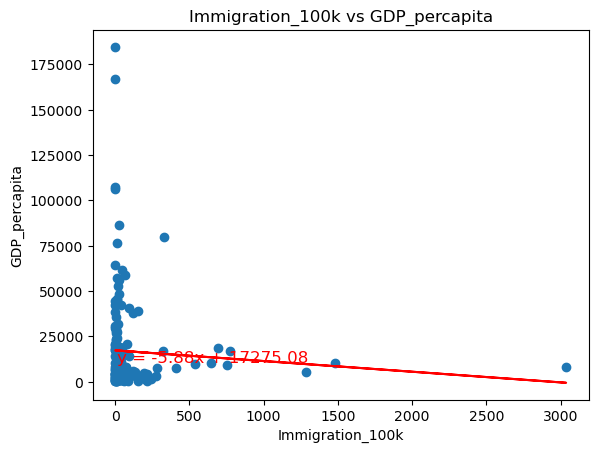

In [18]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'GDP_percapita')

 The r^value is : -0.133


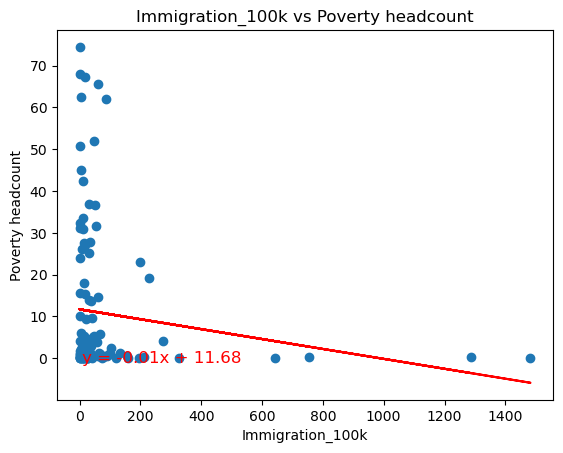

In [19]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Poverty headcount')


 The r^value is : 0.235


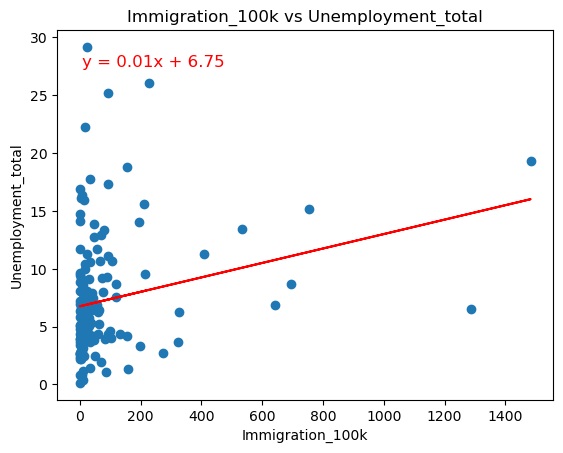

In [20]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Unemployment_total')

 The r^value is : 0.11


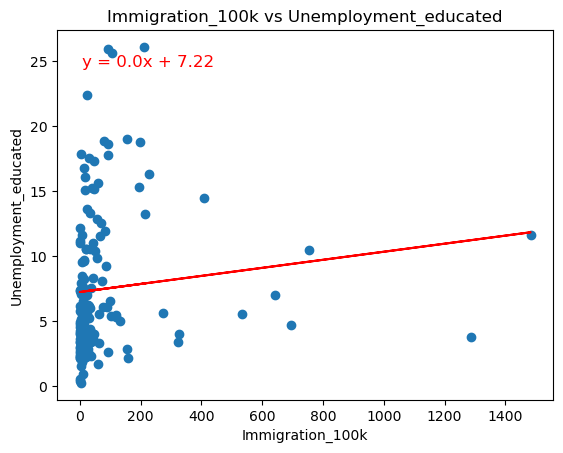

In [21]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Unemployment_educated')

# map world

In [24]:
## Create a world map with Vaccination %


## change US name to fit with world_df
# imm_df['country'] = imm_df['country'].replace({'United States': 'United States of America'})


data = pd.DataFrame({
    'country_name': imm_cumul_df['country'],  
    'vaccination': imm_cumul_df['Immigration_flow']  
})

# Load the world map
# world = gpd.read_file(gpd.datasets.get_path('Resources/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'))
world = gpd.read_file('Resources/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Merge the GeoDataFrame with your data
world = world.merge(data, how="left", left_on="name", right_on="country_name")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Immigration_flow', ax=ax, legend=True,
           cmap='YlGn', missing_kwds={"color": "lightgrey"})

plt.title('Vaccination Percentage by Country', fontsize = 30)
# plt.savefig("Output/Q4_Vaccination%_worldwide.png")

plt.show()

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing pyogrio resulted in: No module named 'pyogrio'
Importing fiona resulted in: No module named 'fiona'